In [1]:
import pandas as pd
from patsy import dmatrix
import numpy as np
import seaborn as sns
import matplotlib as mpl
import matplotlib.pyplot as plt
import scipy as sp
plt.rc("font", family="Malgun Gothic")
mpl.rcParams['axes.unicode_minus'] = False

In [16]:
from sklearn.datasets import make_regression
X0, y, w = make_regression(n_samples=200, n_features=1, bias=100, noise=10, coef=True, random_state=1)

In [17]:
df = pd.DataFrame({'x': X0[:, 0], 'y': y[:]})
df.head()

,x,y
0,0.232495,127.879017
1,-0.038696,93.032914
2,0.550537,161.857508
3,0.503185,141.692050
4,2.186980,283.260119


In [18]:
import statsmodels.api as sm 
model = sm.OLS.from_formula("y ~ x", data=df)
result = model.fit()

In [19]:
# 위랑 같은경우
# dfy = df[["y"]]
# dfx = sm.add_constant(df[['x]])
# model = sm.OLS(dfy, dfx)
# result = model.fit()

In [20]:
print(result.summary())

                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.985
Model:                            OLS   Adj. R-squared:                  0.985
Method:                 Least Squares   F-statistic:                 1.278e+04
Date:                Sun, 28 Nov 2021   Prob (F-statistic):          8.17e-182
Time:                        15:57:30   Log-Likelihood:                -741.28
No. Observations:                 200   AIC:                             1487.
Df Residuals:                     198   BIC:                             1493.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept     99.7915      0.705    141.592      0.0

In [21]:
result.predict({"x": [-2, -1, 0, 1, 2]})

0    -74.131915
1     12.829797
2     99.791509
3    186.753221
4    273.714933
dtype: float64

In [22]:
result.params

Intercept    99.791509
x            86.961712
dtype: float64

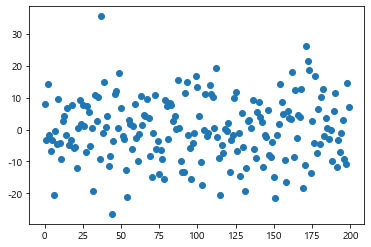

In [23]:
result.resid.plot(style='o')
plt.show()

In [24]:
result.resid.sum()

3.7196912217041245e-12

In [26]:
result.predict({'x':X0.mean()}), y.mean()

(0    109.069351
 dtype: float64,
 109.06935068170773)

In [29]:
# 보스턴집값 예측
from sklearn.datasets import load_boston
boston = load_boston()

dfx0 = pd.DataFrame(boston.data, columns=boston.feature_names)
dfx = sm.add_constant(dfx0)
dfy = pd.DataFrame(boston.target, columns=['medv'])

model_boston = sm.OLS(dfy, dfx)
result_boston = model_boston.fit()

In [31]:
print(result_boston.summary())

                            OLS Regression Results                            
Dep. Variable:                   medv   R-squared:                       0.741
Model:                            OLS   Adj. R-squared:                  0.734
Method:                 Least Squares   F-statistic:                     108.1
Date:                Sun, 28 Nov 2021   Prob (F-statistic):          6.72e-135
Time:                        16:04:30   Log-Likelihood:                -1498.8
No. Observations:                 506   AIC:                             3026.
Df Residuals:                     492   BIC:                             3085.
Df Model:                          13                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         36.4595      5.103      7.144      0.0

In [32]:
result_boston.params

const      36.459488
CRIM       -0.108011
ZN          0.046420
INDUS       0.020559
CHAS        2.686734
NOX       -17.766611
RM          3.809865
AGE         0.000692
DIS        -1.475567
RAD         0.306049
TAX        -0.012335
PTRATIO    -0.952747
B           0.009312
LSTAT      -0.524758
dtype: float64